### Cancer Detection from Mammogram Data Files using Keras and Sourcing Data from USF ###

   One in 8 US women (~12.4%) will develop an invasive form of breast cancer over the course of her lifetime. In 2018, 
an estimated >200000 new cases of invasive breast cancer is predicted along with over 60000 new-cases of non-invasive 
breast cancer. [1]
Are men immune to to breast cancer? The answer is no. According to breastcancer.org, ~2500 new cases of invasive breast
cancer will be diagnosed in men by 2018.This is equivalent to 1 in 1000 male with a potential for having the disease.
Besides skin-cancer, breast cancer is the most commonly diagnosed cancer with African-american women more likely at risk 
and gender along with age contributing to the risk-factor.

There are multiple approaches currently available for breast tissue evaluation for cancer cells. All of the approaches involves the use of low-level ionizing x-ray radiation on breast tissue. After a breast exam is done, the expertise of a radiologist is required to convert the mammogram image into an actionable item - Cancer vs no-cancer vs need-further-investigation. Our goal in this project is to demonstrate that a semi, well-trained, Convolutional Neural Network(CNN) can be made to give, cancer along with other malignant tissues, a good detection rate at levels that meet those of well-trained radiologists.[2][3][4] 


![Breast_Cancer_Incidence_Rate](Breast-Cancer-Incidence-Worldwide.jpg)  <img src="Breast.png" width="375" height="400">



### Python Web-Scrapping from USF for Downloading Lossless JPEG files

The mammogram data files used for this ML project were downloaded from the University of South Florida digital 
mammography homepage. (http://marathon.csee.usf.edu/Mammography/Database.html) 
The digital mammography homepage consists of 2600*4 lossless jpeg files and their labels. Each mammogram picture
of a subject consists of both RIGHT_CC(Right Craniocaudal), LEFT_CC (Left Craniocaudal), RIGHT_MLO (Right mediolateral oblique)and LEFT_MLO (Left mediolateral oblique)images. 

Unlike other ML projects were one already has a pre-processed dataset, the mammogram data files used for this project
were in their raw format and thus there was over 3 weeks of hard-work that was expended on feature engineering.

The thought process for feature engineering was broken down into several pieces as highlighted below:
    
    Part (I): Label abstraction from the USF web-page with a python-html web-crawling algorithm.
    Part (II): Feature(lossless JPEG) abstraction from the USF ftp webpage using python-ftp web-crawling algorithm.
    Part (III): Feature(lossless JPEG) transformation from lossless JPEG to png for Machine learning. (A quite     
                difficult,messy, and very slow step). Multiple programming syntaxes were used for this 
                transformation step, including 3rd party programs, command line bash scripting etc.
    Part (IV): Final matching of labels and transformed features for Machine learning. 

## Feature Engineering ##

 Feature Engineering for both the labels and the image datafiles took over 1 month. The brunt of the work was in Image abstraction and Image trnasformation. The enormous size of the
 image features of up-to 500GB (post-conversion) to JPEG meant that it was a bit more dificult handling them.

### Part (I) - Label Abstraction

##### Label abstraction from web-page using Beautiful Soup #####

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup


CancerTypes = ["normals/", "benigns/", "cancers/"]
NormalFiles = ["normal_01/","normal_02/","normal_03/","normal_04/","normal_05/","normal_06/","normal_07/","normal_08/","normal_09/","normal_10/","normal_11/","normal_12/"]
CancerFiles = ["cancer_01/","cancer_02/","cancer_03/","cancer_04/","cancer_05/","cancer_06/","cancer_07/","cancer_08/","cancer_09/","cancer_10/","cancer_11/","cancer_12/","cancer_13/","cancer_14/","cancer_15/"]
BenignFiles = ["benign_01/","benign_02/","benign_03/","benign_04/","benign_05/","benign_06/","benign_07/","benign_08/","benign_09/","benign_10/","benign_11/","benign_12/","benign_13/","benign_14/"]
url1 = "http://marathon.csee.usf.edu/Mammography/DDSM/thumbnails/"
url2 = "overview.html"



filename = []
date_of_study = []
patient_age = []
film = []
film_type = []
Density = []
date_digitized = []
digitizer = []

File_Name1 = []
Total_Abnormality =[]
Lesion_type = []
#Assesment = []
Subtlety = []
Pathology = []


File_Name2 = []
Total_Abnormality2 = []
Lesion_Type2 = []
#Assesment2 = []
Subtlety2 =[]
Pathology2 = []


File_Name3 = []
Total_Abnormality3 = []
Lesion_Type3 = []
#Assesment3 = []
Subtlety3 =[]
Pathology3 = []


File_Name4 = []
Total_Abnormality4 = []
Lesion_Type4 = []
#Assesment4 = []
Subtlety4 =[]
Pathology4 = []

for ii in CancerTypes:
    if ii == "normals/":
        for iii in NormalFiles:
            html4 = urlopen(url1+ii+iii+url2)
            bsObj1 = BeautifulSoup(html4)
            Links3 = []
            for link in bsObj1.findAll("a", {}): 
                if 'href' in link.attrs: 
                    Links3.append(link.attrs['href'])
                    
            for iv in Links3[1:]:
                htmlReal = urlopen(url1+ii+iii+iv)
                bsObjR = BeautifulSoup(htmlReal)
                dataFrame = bsObjR.findAll("pre",{})
                
                YY = str(dataFrame).split('\n')[2:11]

                filename.append((YY[0].split(' '))[1])
                date_of_study.append((YY[1].split(' ', 1))[1])
                patient_age.append((YY[2].split(' '))[1])
                film_type.append((YY[4].split(' '))[1])
                Density.append((YY[5].split(' '))[1])
                date_digitized.append((YY[6].split(' ', 1))[1])
                digitizer.append((YY[7].split(' '))[1])
                
                #Appending N/A to other values so that there is continuity#
                File_Name1.append("NA")
                Total_Abnormality.append("NA")
                Lesion_type.append("NA")
                #Assesment.append("N/A")
                Subtlety.append("NA")
                Pathology.append("NA")


                File_Name2.append("NA")
                Total_Abnormality2.append("NA")
                Lesion_Type2.append("NA")
                #Assesment2.append("N/A")
                Subtlety2.append("NA")
                Pathology2.append("NA")


                File_Name3.append("NA")
                Total_Abnormality3.append("NA")
                Lesion_Type3.append("NA")
                #Assesment3.append("N/A")
                Subtlety3.append("NA")
                Pathology3.append("NA")


                File_Name4.append("NA")
                Total_Abnormality4.append("NA")
                Lesion_Type4.append("NA")
                #Assesment4.append("N/A")
                Subtlety4.append("NA")
                Pathology4.append("NA")
                
                
    elif ii == "benigns/":
        ix = CancerTypes[1]
        for iii in BenignFiles:
            URL = str(url1)+ ix + str(iii)
            print(URL)
            html4 = urlopen(URL+url2)
            bsObj1 = BeautifulSoup(html4)
            Links3 = []
            for link in bsObj1.findAll("a", {}): 
                if 'href' in link.attrs: 
                    Links3.append(link.attrs['href'])
    
            for iv in Links3[2:]:
                htmlReal = urlopen(URL+iv)
                bsObjR = BeautifulSoup(htmlReal)
                dataFrame = bsObjR.findAll("pre",{})

                YY = str(dataFrame).split('\n')[2:11]
                YYY = []
                for ii in dataFrame:
                    iii = ii.get_text()
                    YYY.append(str(iii).split('\n'))

                if len(YYY) == 3:
                    print(URL+iv)
                    YYX= YYY[0][2:11]
                    filename.append((YYX[0].split(' '))[1])
                    date_of_study.append((YYX[1].split(' ', 1))[1])
                    patient_age.append((YYX[2].split(' '))[1])
                    film_type.append((YYX[4].split(' '))[1])
                    Density.append((YYX[5].split(' '))[1])
                    date_digitized.append((YYX[6].split(' ', 1))[1])
                    digitizer.append((YYX[7].split(' '))[1])

                    YYZ= YYY[1][1:10]
                    File_Name1.append((YYZ[0].split(' '))[1])
                    Total_Abnormality.append((YYZ[2].split(' '))[1])
                    Lesion_type.append((YYZ[4].split(' ', 1))[1])
                    #Assesment.append((YYZ[5].split(' '))[1])
                    Subtlety.append((YYZ[6].split(' '))[1])
                    Pathology.append((YYZ[7].split(' '))[1])

                    YYA = YYY[2][1:10]
                    File_Name2.append((YYA[0].split(' '))[1])
                    Total_Abnormality2.append((YYA[2].split(' '))[1])
                    Lesion_Type2.append((YYA[4].split(' ', 1))[1])
                    #Assesment2.append((YYA[5].split(' '))[1])
                    Subtlety2.append((YYA[6].split(' '))[1])
                    Pathology2.append((YYA[7].split(' '))[1])
                    #Appending N/A to other values so that there is continuity#


                    File_Name3.append("NA")
                    Total_Abnormality3.append("NA")
                    Lesion_Type3.append("NA")
                    #Assesment3.append("N/A")
                    Subtlety3.append("NA")
                    Pathology3.append("NA")


                    File_Name4.append("NA")
                    Total_Abnormality4.append("NA")
                    Lesion_Type4.append("NA")
                    #Assesment4.append("N/A")
                    Subtlety4.append("NA")
                    Pathology4.append("NA")    

                elif len(YYY) == 5:
                    print(URL+iv)
                    YYX= YYY[0][2:11]
                    filename.append((YYX[0].split(' '))[1])
                    date_of_study.append((YYX[1].split(' ', 1))[1])
                    patient_age.append((YYX[2].split(' '))[1])
                    film_type.append((YYX[4].split(' '))[1])
                    Density.append((YYX[5].split(' '))[1])
                    date_digitized.append((YYX[6].split(' ', 1))[1])
                    digitizer.append((YYX[7].split(' '))[1])

                    YYZ= YYY[1][1:10]
                    File_Name1.append((YYZ[0].split(' '))[1])
                    Total_Abnormality.append((YYZ[2].split(' '))[1])
                    Lesion_type.append((YYZ[4].split(' ', 1))[1])
                    #Assesment.append((YYZ[5].split(' '))[1])
                    Subtlety.append((YYZ[6].split(' '))[1])
                    Pathology.append((YYZ[7].split(' '))[1])

                    YYA = YYY[2][1:10]
                    File_Name2.append((YYA[0].split(' '))[1])
                    Total_Abnormality2.append((YYA[2].split(' '))[1])
                    Lesion_Type2.append((YYA[4].split(' ', 1))[1])
                    #Assesment2.append((YYA[5].split(' '))[1])
                    Subtlety2.append((YYA[6].split(' '))[1])
                    Pathology2.append((YYA[7].split(' '))[1])

                    YYB = YYY[3][1:10]
                    File_Name3.append((YYB[0].split(' '))[1])
                    Total_Abnormality3.append((YYB[2].split(' '))[1])
                    Lesion_Type3.append((YYB[4].split(' ', 1))[1])
                    #Assesment3.append((YYB[5].split(' '))[1])
                    Subtlety3.append((YYB[6].split(' '))[1])
                    Pathology3.append((YYB[7].split(' '))[1])

                    YYC = YYY[4][1:10]
                    File_Name4.append((YYC[0].split(' '))[1])
                    Total_Abnormality4.append((YYC[2].split(' '))[1])
                    Lesion_Type4.append((YYC[4].split(' ', 1))[1])
                    #Assesment4.append((YYC[5].split(' '))[1])
                    Subtlety4.append((YYC[6].split(' '))[1])
                    Pathology4.append((YYC[7].split(' '))[1])


    elif ii == "cancers/":
        ixx = CancerTypes[2]
        for iii in CancerFiles:
            URL1 = str(url1)+ ixx + str(iii)
            print(URL1)
            html4 = urlopen(URL1+url2)
            bsObj1 = BeautifulSoup(html4)
            Links3 = []
            for link in bsObj1.findAll("a", {}): 
                if 'href' in link.attrs: 
                    Links3.append(link.attrs['href'])

            for iv in Links3[2:]:
                htmlReal = urlopen(URL1+iv)
                bsObjR = BeautifulSoup(htmlReal)
                dataFrame = bsObjR.findAll("pre",{})

                YY = str(dataFrame).split('\n')[2:11]
                YYY = []
                for ii in dataFrame:
                    iii = ii.get_text()
                    YYY.append(str(iii).split('\n'))

                if len(YYY) == 3:
                    print(URL1+iv)
                    YYX= YYY[0][2:11]
                    filename.append((YYX[0].split(' '))[1])
                    date_of_study.append((YYX[1].split(' ', 1))[1])
                    patient_age.append((YYX[2].split(' '))[1])
                    film_type.append((YYX[4].split(' '))[1])
                    Density.append((YYX[5].split(' '))[1])
                    date_digitized.append((YYX[6].split(' ', 1))[1])
                    digitizer.append((YYX[7].split(' '))[1])

                    YYZ= YYY[1][1:10]
                    File_Name1.append((YYZ[0].split(' '))[1])
                    Total_Abnormality.append((YYZ[2].split(' '))[1])
                    Lesion_type.append((YYZ[4].split(' ', 1))[1])
                    #Assesment.append((YYZ[5].split(' '))[1])
                    Subtlety.append((YYZ[6].split(' '))[1])
                    Pathology.append((YYZ[7].split(' '))[1])

                    YYA = YYY[2][1:10]
                    File_Name2.append((YYA[0].split(' '))[1])
                    Total_Abnormality2.append((YYA[2].split(' '))[1])
                    Lesion_Type2.append((YYA[4].split(' ', 1))[1])
                    #Assesment2.append((YYA[5].split(' '))[1])
                    Subtlety2.append((YYA[6].split(' '))[1])
                    Pathology2.append((YYA[7].split(' '))[1])
                    #Appending N/A to other values so that there is continuity#


                    File_Name3.append("NA")
                    Total_Abnormality3.append("NA")
                    Lesion_Type3.append("NA")
                    #Assesment3.append("N/A")
                    Subtlety3.append("NA")
                    Pathology3.append("NA")


                    File_Name4.append("NA")
                    Total_Abnormality4.append("NA")
                    Lesion_Type4.append("NA")
                    #Assesment4.append("N/A")
                    Subtlety4.append("NA")
                    Pathology4.append("NA")    

                elif len(YYY) == 5:
                    print(URL1+iv)
                    YYX= YYY[0][2:11]
                    filename.append((YYX[0].split(' '))[1])
                    date_of_study.append((YYX[1].split(' ', 1))[1])
                    patient_age.append((YYX[2].split(' '))[1])
                    film_type.append((YYX[4].split(' '))[1])
                    Density.append((YYX[5].split(' '))[1])
                    date_digitized.append((YYX[6].split(' ', 1))[1])
                    digitizer.append((YYX[7].split(' '))[1])

                    YYZ= YYY[1][1:10]
                    File_Name1.append((YYZ[0].split(' '))[1])
                    Total_Abnormality.append((YYZ[2].split(' '))[1])
                    Lesion_type.append((YYZ[4].split(' ', 1))[1])
                    #Assesment.append((YYZ[5].split(' '))[1])
                    Subtlety.append((YYZ[6].split(' '))[1])
                    Pathology.append((YYZ[7].split(' '))[1])

                    YYA = YYY[2][1:10]
                    File_Name2.append((YYA[0].split(' '))[1])
                    Total_Abnormality2.append((YYA[2].split(' '))[1])
                    Lesion_Type2.append((YYA[4].split(' ', 1))[1])
                    #Assesment2.append((YYA[5].split(' '))[1])
                    Subtlety2.append((YYA[6].split(' '))[1])
                    Pathology2.append((YYA[7].split(' '))[1])

                    YYB = YYY[3][1:10]
                    File_Name3.append((YYB[0].split(' '))[1])
                    Total_Abnormality3.append((YYB[2].split(' '))[1])
                    Lesion_Type3.append((YYB[4].split(' ', 1))[1])
                    #Assesment3.append((YYB[5].split(' '))[1])
                    Subtlety3.append((YYB[6].split(' '))[1])
                    Pathology3.append((YYB[7].split(' '))[1])

                    YYC = YYY[4][1:10]
                    File_Name4.append((YYC[0].split(' '))[1])
                    Total_Abnormality4.append((YYC[2].split(' '))[1])
                    Lesion_Type4.append((YYC[4].split(' ', 1))[1])
                    #Assesment4.append((YYC[5].split(' '))[1])
                    Subtlety4.append((YYC[6].split(' '))[1])
                    Pathology4.append((YYC[7].split(' '))[1])

/Users/taiwoalabi/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/taiwoalabi/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


http://marathon.csee.usf.edu/Mammography/DDSM/thumbnails/benigns/benign_01/
http://marathon.csee.usf.edu/Mammography/DDSM/thumbnails/benigns/benign_01/case0029/C-0029-1.html
http://marathon.csee.usf.edu/Mammography/DDSM/thumbnails/benigns/benign_01/case0033/C-0033-1.html
http://marathon.csee.usf.edu/Mammography/DDSM/thumbnails/benigns/benign_01/case0217/C-0217-1.html
http://marathon.csee.usf.edu/Mammography/DDSM/thumbnails/benigns/benign_01/case0235/C-0235-1.html
http://marathon.csee.usf.edu/Mammography/DDSM/thumbnails/benigns/benign_01/case0237/C-0237-1.html
http://marathon.csee.usf.edu/Mammography/DDSM/thumbnails/benigns/benign_01/case0238/C-0238-1.html
http://marathon.csee.usf.edu/Mammography/DDSM/thumbnails/benigns/benign_01/case0239/C-0239-1.html
http://marathon.csee.usf.edu/Mammography/DDSM/thumbnails/benigns/benign_01/case0240/C-0240-1.html
http://marathon.csee.usf.edu/Mammography/DDSM/thumbnails/benigns/benign_01/case0241/C-0241-1.html
http://marathon.csee.usf.edu/Mammography/D

In [2]:
import numpy as np
import pandas as pd

True3= np.vstack((filename , date_of_study, patient_age, film_type, Density, date_digitized, digitizer, File_Name1, Total_Abnormality, Lesion_type,Subtlety, Pathology, File_Name2, Total_Abnormality2, Lesion_Type2, Subtlety2, Pathology2, File_Name3, Total_Abnormality3, Lesion_Type3,Subtlety3, Pathology3, File_Name4, Total_Abnormality4, Lesion_Type4, Subtlety4, Pathology4))



In [3]:
True3= True3.transpose()
Column_Names1= ['File_Name', 'Date', 'Age', 'Film-Type', 'Breast-Density', 'Date-Digitized', 'Digitizer-Platform','File_Name1', 'Abnormality-Count1', 'Lesion-Type1', 'Subtlety1', 'Pathology1', 'File_Name2', 'Abnormality-Count2', 'Lesion-Type2','Subtlety2', 'Pathology2', 'File_Name3', 'Abnormality-Count3', 'Lesion-Type3', 'Subtlety3', 'Pathology3','File_Name4', 'Abnormality-Count4', 'Lesion-Type4', 'Subtlety4', 'Pathology4']
True4 = pd.DataFrame(True3,columns= Column_Names1)

In [4]:
True4.to_csv('~/Desktop/Mammogram_Labels.csv', sep = ',')

#### Label-Generation and Matching

In [5]:
import csv
import pandas as pd
import numpy as np

ken= pd.read_csv('~/Desktop/Mammogram_Labels.csv')

GlobalLabelsRMLO = []
GlobalDensityRMLO = []
GlobalFileNameRMLO = []
GlobalIntensityRMLO =[]

GlobalLabelsLMLO = []
GlobalDensityLMLO = []
GlobalFileNameLMLO = []
GlobalIntensityLMLO = []

GlobalLabelsLCC = []
GlobalDensityLCC = []
GlobalFileNameLCC = []
GlobalIntensityLCC = []

GlobalLabelsRCC = []
GlobalDensityRCC = []
GlobalFileNameRCC = []
GlobalIntensityRCC = []

In [6]:
Label1 = ken.loc[1, 'File_Name']
print(Label1.split('-'))

['A', '0003', '1']


In [7]:
FileName1 = Label1[0]+"_"+Label1[1]+"_"+Label1[2]+".RIGHT_MLO"
File1 =FileName1 + ".OVERLAY"

FileName2 = Label1[0]+"_"+Label1[1]+"_"+Label1[2]+".LEFT_MLO"
File2 = FileName2 + ".OVERLAY"

FileName3 = Label1[0]+"_"+Label1[1]+"_"+Label1[2]+".LEFT_CC"
File3 = FileName3 + ".OVERLAY"

FileName4 = Label1[0]+"_"+Label1[1]+"_"+Label1[2]+".RIGHT_CC"
File4 = FileName4 + ".OVERLAY"

#### Cancer Detection Nuances from the DDSM database

[1] N - Negative 

[2] B - Negative 

[3] P - Probably Benign

[4] S - Suspicious Abnormality

[5] M - Malignancy

In [ ]:
for ii in range(len(ken)):
    Label = ken.loc[ii, 'File_Name']
    Label1 = Label.split('-')
    FileName1 = Label1[0]+"_"+Label1[1]+"_"+Label1[2]+".RIGHT_MLO"
    File1 =FileName1+".OVERLAY"

    FileName2 = Label1[0]+"_"+Label1[1]+"_"+Label1[2]+".LEFT_MLO"
    File2 = FileName2 + ".OVERLAY"

    FileName3 = Label1[0]+"_"+Label1[1]+"_"+Label1[2]+".LEFT_CC"
    File3 = FileName3 + ".OVERLAY"

    FileName4 = Label1[0]+"_"+Label1[1]+"_"+Label1[2]+".RIGHT_CC"
    File4 = FileName4 + ".OVERLAY"
    
    ListNames = [File1, File2, File3, File4]
    
    #File1
    if ((File1 != ken.loc[ii, 'File_Name1']) & (File1 != ken.loc[ii, 'File_Name2']) & (File1 != ken.loc[ii, 'File_Name3']) & (File1 != ken.loc[ii, 'File_Name4'])):
        GlobalLabelsRMLO.append("No_Cancer")
        GlobalFileNameRMLO.append(FileName1)
        GlobalDensityRMLO.append(ken.loc[ii,'Breast-Density'])
        GlobalIntensityRMLO.append('None')
    else:
        GlobalLabelsRMLO.append("Cancer")
        GlobalFileNameRMLO.append(FileName1)
        GlobalDensityRMLO.append(ken.loc[ii,'Breast-Density'])
        if File1 == ken.loc[ii, 'File_Name1']:
            GlobalIntensityRMLO.append(ken.loc[ii, 'Pathology1'])
        elif File1 == ken.loc[ii, 'File_Name2']:
            GlobalIntensityRMLO.append(ken.loc[ii, 'Pathology2'])
        elif File1 == ken.loc[ii, 'File_Name3']:
            GlobalIntensityRMLO.append(ken.loc[ii, 'Pathology3'])
        elif File1 == ken.loc[ii, 'File_Name4']:
            GlobalIntensityRMLO.append(ken.loc[ii, 'Pathology4'])

     
    #File2
    if ((File2 != ken.loc[ii, 'File_Name1']) & (File2 != ken.loc[ii, 'File_Name2']) & (File2 != ken.loc[ii, 'File_Name3']) & (File2 != ken.loc[ii, 'File_Name4'])):
        GlobalLabelsLMLO.append("No_Cancer")
        GlobalFileNameLMLO.append(FileName2)
        GlobalDensityLMLO.append(ken.loc[ii,'Breast-Density'])
        GlobalIntensityLMLO.append('None')
    else:
        GlobalLabelsLMLO.append("Cancer")
        GlobalFileNameLMLO.append(FileName2)
        GlobalDensityLMLO.append(ken.loc[ii,'Breast-Density'])
        if File2 == ken.loc[ii, 'File_Name1']:
            GlobalIntensityLMLO.append(ken.loc[ii, 'Pathology1'])
        elif File2 == ken.loc[ii, 'File_Name2']:
            GlobalIntensityLMLO.append(ken.loc[ii, 'Pathology2'])
        elif File2 == ken.loc[ii, 'File_Name3']:
            GlobalIntensityLMLO.append(ken.loc[ii, 'Pathology3'])
        elif File2 == ken.loc[ii, 'File_Name4']:
            GlobalIntensityLMLO.append(ken.loc[ii, 'Pathology4'])
   
            
    #File3
    if ((File3 != ken.loc[ii, 'File_Name1']) & (File3 != ken.loc[ii, 'File_Name2']) & (File3 != ken.loc[ii, 'File_Name3']) & (File3 != ken.loc[ii, 'File_Name4'])):
        GlobalLabelsLCC.append("No_Cancer")
        GlobalFileNameLCC.append(FileName3)
        GlobalDensityLCC.append(ken.loc[ii,'Breast-Density'])
        GlobalIntensityLCC.append('None')
    else:
        GlobalLabelsLCC.append("Cancer")
        GlobalFileNameLCC.append(FileName3)
        GlobalDensityLCC.append(ken.loc[ii,'Breast-Density'])
        if File3 == ken.loc[ii, 'File_Name1']:
            GlobalIntensityLCC.append(ken.loc[ii, 'Pathology1'])
        elif File3 == ken.loc[ii, 'File_Name2']:
            GlobalIntensityLCC.append(ken.loc[ii, 'Pathology2'])
        elif File3 == ken.loc[ii, 'File_Name3']:
            GlobalIntensityLCC.append(ken.loc[ii, 'Pathology3'])
        elif File3 == ken.loc[ii, 'File_Name4']:
            GlobalIntensityLCC.append(ken.loc[ii, 'Pathology4'])

            
    #File4
    if ((File4 != ken.loc[ii, 'File_Name1']) & (File4 != ken.loc[ii, 'File_Name2']) & (File4 != ken.loc[ii, 'File_Name3']) & (File4 != ken.loc[ii, 'File_Name4'])):
        GlobalLabelsRCC.append("No_Cancer")
        GlobalFileNameRCC.append(FileName4)
        GlobalDensityRCC.append(ken.loc[ii,'Breast-Density'])
        GlobalIntensityRCC.append('None')
    else:
        GlobalLabelsRCC.append("Cancer")
        GlobalFileNameRCC.append(FileName4)
        GlobalDensityRCC.append(ken.loc[ii,'Breast-Density'])
        if File4 == ken.loc[ii, 'File_Name1']:
            GlobalIntensityRCC.append(ken.loc[ii, 'Pathology1'])
        elif File4 == ken.loc[ii, 'File_Name2']:
            GlobalIntensityRCC.append(ken.loc[ii, 'Pathology2'])
        elif File4 == ken.loc[ii, 'File_Name3']:
            GlobalIntensityRCC.append(ken.loc[ii, 'Pathology3'])
        elif File4 == ken.loc[ii, 'File_Name4']:
            GlobalIntensityRCC.append(ken.loc[ii, 'Pathology4'])   


            
            
            
RMLO= np.vstack((GlobalLabelsRMLO, GlobalDensityRMLO, GlobalFileNameRMLO, GlobalIntensityRMLO))
LMLO= np.vstack((GlobalLabelsLMLO, GlobalDensityLMLO, GlobalFileNameLMLO, GlobalIntensityLMLO))
LCC = np.vstack((GlobalLabelsLCC, GlobalDensityLCC, GlobalFileNameLCC, GlobalIntensityLCC))
RCC = np.vstack((GlobalLabelsRCC, GlobalDensityRCC, GlobalFileNameRCC, GlobalIntensityRCC))
RMLO1= RMLO.transpose()
LMLO1 = LMLO.transpose()
LCC1 = LCC.transpose()
RCC1 = RCC.transpose()
Column_Names= ['Labels', 'Breast_Density', 'File_Name', 'Cancer_Intensity']

RMLO2= pd.DataFrame(RMLO1,columns= Column_Names)
LMLO2 = pd.DataFrame(LMLO1,columns= Column_Names)
LCC2 = pd.DataFrame(LCC1,columns= Column_Names)
RCC2 = pd.DataFrame(RCC1,columns= Column_Names)


RMLO2.to_csv('~/Desktop/RMLO.csv', sep = ',')
LMLO2.to_csv('~/Desktop/LMLO.csv', sep = ',')
LCC2.to_csv('~/Desktop/LCC.csv', sep = ',')
RCC2.to_csv('~/Desktop/RCC.csv', sep = ',')

### Re-engineered feature representation

In [9]:
print("Labels", len(GlobalLabelsRMLO))
print("Density", len(GlobalDensityRMLO))
print("Global File Name", len(GlobalFileNameRMLO))
print("Global Intensity", len(GlobalIntensityRMLO))

Labels 2348
Density 2348
Global File Name 2348
Global Intensity 2348


In [10]:
count =0
for ii in range(len(GlobalLabelsRMLO)):
    if (GlobalLabelsRMLO[ii] == "N"):
        count +=1
print(count)

2291


In [11]:
YY = np.array(GlobalLabelsRMLO)

In [12]:
np.unique(YY)

array(['B', 'N', 'NotSupplied', 'P', 'S'], dtype='<U11')

In [13]:
print("Labels", len(GlobalLabelsLMLO))
print("Density", len(GlobalDensityLMLO))
print("Global File Name", len(GlobalFileNameLMLO))
print("Global Intensity", len(GlobalIntensityLMLO))

Labels 2348
Density 2348
Global File Name 2348
Global Intensity 2348


In [14]:
YY = np.array(GlobalLabelsLMLO)
np.unique(YY)

array(['B', 'M', 'N', 'P', 'S'], dtype='<U1')

In [15]:
count =0
for ii in range(len(GlobalLabelsLMLO)):
    if (GlobalLabelsLMLO[ii] == "P"):
        count +=1
print(count)

16


In [16]:
print("Labels", len(GlobalLabelsRCC))
print("Density", len(GlobalDensityRCC))
print("Global File Name", len(GlobalFileNameRCC))
print("Global Intensity", len(GlobalIntensityRCC))

Labels 2348
Density 2348
Global File Name 2348
Global Intensity 2348


In [17]:
YY = np.array(GlobalLabelsRCC)
np.unique(YY)

array(['B', 'N', 'NotSupplied', 'P', 'S'], dtype='<U11')

In [18]:
count =0
for ii in range(len(GlobalLabelsRCC)):
    if (GlobalLabelsRCC[ii] == "B"):
        count +=1
print(count)

38


In [19]:
print("Labels", len(GlobalLabelsLCC))
print("Density", len(GlobalDensityRCC))
print("Global File Name", len(GlobalFileNameLCC))
print("Global Intensity", len(GlobalIntensityLCC))

Labels 2348
Density 2348
Global File Name 2348
Global Intensity 2348


In [20]:
YY = np.array(GlobalLabelsLCC)
np.unique(YY)

array(['B', 'M', 'N', 'P'], dtype='<U1')

In [21]:
count =0
for ii in range(len(GlobalLabelsLCC)):
    if (GlobalLabelsLCC[ii] == "P"):
        count +=1
print(count)

10


### Relabelling the features to represent the Malignant and non-Malignant Cancer cells

In [22]:
RMLO= np.vstack((GlobalLabelsRMLO, GlobalDensityRMLO, GlobalFileNameRMLO, GlobalIntensityRMLO))
LMLO= np.vstack((GlobalLabelsLMLO, GlobalDensityLMLO, GlobalFileNameLMLO, GlobalIntensityLMLO))
LCC = np.vstack((GlobalLabelsLCC, GlobalDensityLCC, GlobalFileNameLCC, GlobalIntensityLCC))
RCC = np.vstack((GlobalLabelsRCC, GlobalDensityRCC, GlobalFileNameRCC, GlobalIntensityRCC))
RMLO1= RMLO.transpose()
LMLO1 = LMLO.transpose()
LCC1 = LCC.transpose()
RCC1 = RCC.transpose()
Column_Names= ['Labels', 'Breast_Density', 'File_Name', 'Cancer_Intensity']

RMLO2= pd.DataFrame(RMLO1,columns= Column_Names)
LMLO2 = pd.DataFrame(LMLO1,columns= Column_Names)
LCC2 = pd.DataFrame(LCC1,columns= Column_Names)
RCC2 = pd.DataFrame(RCC1,columns= Column_Names)


RMLO2.to_csv('~/Desktop/RMLO.csv', sep = ',')
LMLO2.to_csv('~/Desktop/LMLO.csv', sep = ',')
LCC2.to_csv('~/Desktop/LCC.csv', sep = ',')
RCC2.to_csv('~/Desktop/RCC.csv', sep = ',')

## Cleansing the RCC and the LCC files for better matching of labels per description of lesions found

In [23]:
Smart_List = ["5","4"]

for ii in range(len(RCC2)):
    if ((RCC2.loc[ii, "Cancer_Intensity"] == "MALIGNANT") | (str(RCC2.loc[ii, "Cancer_Intensity"]) in Smart_List )):
         RCC2.loc[ii, "Labels"] = "M"
        

In [24]:
RCC2.to_csv('~/Desktop/RCC.csv', sep = ',')

In [25]:
Smart_List = ["5","4"]

for ii in range(len(LCC2)):
    if ((LCC2.loc[ii, "Cancer_Intensity"] == "MALIGNANT") | (str(LCC2.loc[ii, "Cancer_Intensity"]) in Smart_List )):
         LCC2.loc[ii, "Labels"] = "M"

In [26]:
LCC2.to_csv('~/Desktop/LCC.csv', sep = ',')

### Part (III) - Lossless-JPEG Image transformation to JPEG and PNG Files for Convolutional Neural Networks

### Label Matching and CNN Network Development for Cancer Prediction ###

### Image Transformation and Image randomization prior to CNN Training

##### Importing all the relevant packages for Image transformation and for Machine Learning on a CNN

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pandas as pd
import os
import time
from PIL import Image
import sys
import tensorflow as tf
import cv2
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import np_utils
from keras import backend as K
from sklearn.cross_validation import train_test_split
print("Done Uploading all Packages")

/Users/taiwoalabi/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Done Uploading all Packages


/Users/taiwoalabi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
ken1= pd.read_csv('~/Desktop/Machine_Learning_Projects/Image_Analysis_Cancer/LCC.csv')
ken2= pd.read_csv('~/Desktop/Machine_Learning_Projects/Image_Analysis_Cancer/RCC.csv')
ken3= pd.read_csv('~/Desktop/Machine_Learning_Projects/Image_Analysis_Cancer/LMLO.csv')
ken4= pd.read_csv('~/Desktop/Machine_Learning_Projects/Image_Analysis_Cancer/RMLO.csv')

#frames = [ken1, ken2, ken3, ken4]
frames = [ken1, ken2]
FullFrame = pd.concat(frames)

print(len(FullFrame))

4696


In [28]:
ken1= pd.read_csv('~/Desktop/LCC.csv')
ken2= pd.read_csv('~/Desktop/RCC.csv')
ken3= pd.read_csv('~/Desktop/LMLO.csv')
ken4= pd.read_csv('~/Desktop/RMLO.csv')

#frames = [ken1, ken2, ken3, ken4]
frames = [ken1, ken2]
FullFrame = pd.concat(frames)

print(len(FullFrame))

4696


#### Reading into memory all image native image files (.png) and transforming files to the right shape for CNN ML.
#### Reading into memory the corresponding labels(tags)


Various techniques were employed to try to improve the accuracy of the covNet including:

i) image resizing(enlargement) post transformation

ii) image rendition from BGR to Gray and from BGR to HLS. The example codes are shown below

In [29]:
#RIGHT CRANIOCAUDAL
X1L = [] #labels
X3L = [] #Images
path = "/Volumes/RaphaelA/RIGHT_ONLY_BENIGN"
os.chdir(path)
YY = [doc for doc in os.listdir() if doc.endswith((".RIGHT_CC.LJPEG.png"))]
#YY2 = [doc for doc in os.listdir() if doc.endswith((".LEFT_CC.LJPEG.jpg"))]
for ii in range(len(FullFrame)):
    for tete in YY:
        tete1 = tete.split('.')[0] +'.'+ tete.split('.')[1]+'.'+"LJPEG"
        tete2 = tete.split('.')[0] +'.'+ tete.split('.')[1]
        if ((tete2 == FullFrame.iat[ii,3])):
            X1L.append(FullFrame.iat[ii,1])
            #ImageName = tete1 + '.png'
            ImageName = tete1 + ".jpg"
            #img = Image.open(ImageName)
            #WIDTH = 500
            #HEIGHT = 500
            WIDTH = 350
            HEIGHT = 350
            full_size_image = cv2.imread(ImageName)
            gray = cv2.cvtColor(full_size_image,cv2.COLOR_BGR2GRAY)
            ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            X3L.append(cv2.resize(gray, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            #X2.append(array(img))

In [30]:
print(X1L)

['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

In [ ]:
#LEFT CRANIOCAUDAL
X1L = [] #labels
X3L = [] #Images
path = "/Volumes/RaphaelA/RIGHT_ONLY_BENIGN"
os.chdir(path)
YY = [doc for doc in os.listdir() if doc.endswith((".RIGHT_CC.LJPEG.png"))]
#YY2 = [doc for doc in os.listdir() if doc.endswith((".LEFT_CC.LJPEG.jpg"))]
for ii in range(len(FullFrame)):
    for tete in YY:
        tete1 = tete.split('.')[0] +'.'+ tete.split('.')[1]+'.'+"LJPEG"
        tete2 = tete.split('.')[0] +'.'+ tete.split('.')[1]
        if tete2 == FullFrame.iat[ii,3]:
            X1L.append(FullFrame.iat[ii,1])
            ImageName = tete1 + '.png'
            #ImageName = tete1 + ".jpg"
            #img = Image.open(ImageName)
            WIDTH = 299
            HEIGHT = 299
            #WIDTH = 350
            #HEIGHT = 350
            full_size_image = cv2.imread(ImageName)
            X3L.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            #X2.append(array(img))

In [18]:
#RIGHT CRANIOCAUDAL
X1L = [] #labels
X3L = [] #Images
path = "/Volumes/RaphaelA/RIGHT_ONLY_BENIGN"
os.chdir(path)
YY = [doc for doc in os.listdir() if doc.endswith((".RIGHT_CC.LJPEG.png"))]
#YY2 = [doc for doc in os.listdir() if doc.endswith((".LEFT_CC.LJPEG.jpg"))]
for ii in range(len(FullFrame)):
    for tete in YY:
        tete1 = tete.split('.')[0] +'.'+ tete.split('.')[1]+'.'+"LJPEG"
        tete2 = tete.split('.')[0] +'.'+ tete.split('.')[1]
        if ((tete2 == FullFrame.iat[ii,3]) & (FullFrame.iat[ii,2] == 3 )):
            X1L.append(FullFrame.iat[ii,1])
            ImageName = tete1 + '.png'
            #ImageName = tete1 + ".jpg"
            #img = Image.open(ImageName)
            WIDTH = 500
            HEIGHT = 500
            #WIDTH = 350
            #HEIGHT = 350
            full_size_image = cv2.imread(ImageName)
            gray = cv2.cvtColor(full_size_image,cv2.COLOR_BGR2GRAY)
            ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            X3L.append(cv2.resize(gray, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            #X2.append(array(img))

In [ ]:
#RIGHT CRANIOCAUDAL
X1L = [] #labels
X3L = [] #Images
path = "/Volumes/RaphaelA/RIGHT_ONLY_BENIGN"
os.chdir(path)
YY = [doc for doc in os.listdir() if doc.endswith((".RIGHT_CC.LJPEG.png"))]
#YY2 = [doc for doc in os.listdir() if doc.endswith((".LEFT_CC.LJPEG.jpg"))]
for ii in range(len(FullFrame)):
    for tete in YY:
        tete1 = tete.split('.')[0] +'.'+ tete.split('.')[1]+'.'+"LJPEG"
        tete2 = tete.split('.')[0] +'.'+ tete.split('.')[1]
        if ((tete2 == FullFrame.iat[ii,3]) & (FullFrame.iat[ii,2] == 2)):
            X1L.append(FullFrame.iat[ii,1])
            ImageName = tete1 + '.png'
            #ImageName = tete1 + ".jpg"
            #img = Image.open(ImageName)
            #WIDTH = 500
            #HEIGHT = 500
            WIDTH = 300
            HEIGHT = 300
            full_size_image = cv2.imread(ImageName)
            gray = cv2.cvtColor(full_size_image,cv2.COLOR_BGR2HLS)
            #ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            X3L.append(cv2.resize(gray, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))
            #X2.append(array(img))
        

### Image post transformation using BGR2HLS

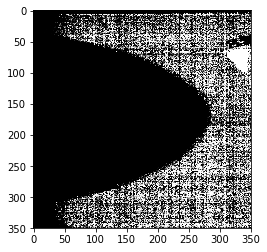

In [34]:
plt.figure()
plt.imshow(X3L[600], interpolation='nearest', cmap='binary')

#### Transforming the List(image arrays) into an array of array and normalizing the array; Transforming the labels

In [36]:
plt.figure()
plt.imshow(Xtrain[20], interpolation='nearest', cmap='binary')

NameError: name 'Xtrain' is not defined

Several CNN networks were experimented including 1D cov Net for (2D picture rendition) and 2D cov Net.

The CNN architecture follows the usual procedure of having 2 convolutional network with a given number of features and input_shape (picture height, width and RGB). A fully connected layer as well as a Flatten step.

In [37]:
X4L = np.array(X3L)
X4L = X4L.astype('float32')
X7L = X4L/255

# Transforming the feature labels
X5L = []
for ii in range(len(X1L)):
    if X1L[ii] == 'Cancer':
        X5L.append(1)
    elif X1L[ii] == 'No_Cancer':
        X5L.append(0)

X6L = np.array(X5L)
y = np_utils.to_categorical(X6L)

num_classes = y.shape[1]


print("Transformation is done")

# Randomization and splitting of the dataset into a training dataset and a testing dataset
Xtrain, Xtest, ytrain, ytest = train_test_split( X7L,y, test_size = 0.2, random_state =0)

print("The shape of Xtrain[0] is: ", Xtrain[0].shape)
print("The shape of ytrain[0] is: ", ytrain[0].shape)

Transformation is done
The shape of Xtrain[0] is:  (350, 350)
The shape of ytrain[0] is:  (2,)


## Rewriting this to indicate that the dataset is more fine-grained than previously

In [35]:
X4L = np.array(X3L)
X4L = X4L.astype('float32')
X7L = X4L/255

# Transforming the feature labels
X5L = []
for ii in range(len(X1L)):
    if X1L[ii] == 'N':
        X5L.append(1)
    elif X1L[ii] == 'B':
        X5L.append(2)
    elif X1L[ii] == 'P':
        X5L.append(3)
    elif X1L[ii] == 'S':
        X5L.append(4)
    elif X1L[ii] == 'M':
        X5L.append(5)
    
    
    
X6L = np.array(X5L)
y = np_utils.to_categorical(X6L)

num_classes = y.shape[1]


print("Transformation is done")

# Randomization and splitting of the dataset into a training dataset and a testing dataset
Xtrain, Xtest, ytrain, ytest = train_test_split( X7L,y, test_size = 0.2, random_state =0)

print("The shape of Xtrain[0] is: ", Xtrain[0].shape)
print("The shape of ytrain[0] is: ", ytrain[0].shape)

Transformation is done
The shape of Xtrain[0] is:  (350, 350)
The shape of ytrain[0] is:  (6,)


In [36]:
print(X5L)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

#### Generating the Convolutional Neural Network with Keras and Tensor Flow

In [ ]:
#2 convolution (1 CONVOLUTION BLOCK)
#1 Artificial Neural network with 512 nodes
#Batch size of 32
#Input shape 300x300x3
#Loss Function - Binary cross-entropy
model = Sequential()
model.add(Conv2D(64, (2, 2), input_shape=(300, 300, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
# Compile model
epochs = 40
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

In [ ]:
#1D Convolution approach#
#2 convolution
#1 Artificial Neural network with 512 nodes
#Batch size of 32
#Input shape 300x300x3
#Loss Function - Binary cross-entropy
model = Sequential()
model.add(Conv1D(5, kernel_size = 5, input_shape=(299, 299), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv1D(5, kernel_size = 5, activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
# Compile model
epochs = 20
lrate = 0.0001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Custom built VGG Architecture on a 1D frame work

Accuracy of the 1D features plateau'ed at 77% indicating potentially indicating need for a 3D (Height x Width x color) dataset and not a (Height x Width) dataset. The computational efficiency of the 1D architecture was better than for 2D conv as would be expected.

In [ ]:
#VGG Architecture on a 1D Network


model = Sequential()
model.add(Conv1D(128, kernel_size = 2, input_shape=(500, 500), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv1D(128, kernel_size = 2, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))

#Conv Block #2
model.add(Conv1D(128, kernel_size = 2, activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv1D(128, kernel_size = 2, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))

#Conv Block #3
model.add(Conv1D(256, kernel_size = 2, activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv1D(256, kernel_size = 2, activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv1D(256, kernel_size = 2, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))

#Conv Block #4
model.add(Conv1D(512, kernel_size = 2, activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv1D(512, kernel_size = 2, activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv1D(512, kernel_size = 2, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))

#Conv Block #5
model.add(Conv1D(512, kernel_size = 2, activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv1D(512, kernel_size = 2, activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv1D(512, kernel_size = 2, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))


model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
# Compile model
epochs = 30
lrate = 0.00001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.06, decay=decay, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

### Custom built VGG Architecture on a Categorical cross entropy loss function for multimodel clasisfication

In [39]:
#VGG Architecture on a 1D Network


model = Sequential()
model.add(Conv1D(128, kernel_size = 2, input_shape=(350, 350), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv1D(128, kernel_size = 2, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))

#Conv Block #2
model.add(Conv1D(128, kernel_size = 2, activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv1D(128, kernel_size = 2, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))

#Conv Block #3
model.add(Conv1D(256, kernel_size = 2, activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv1D(256, kernel_size = 2, activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv1D(256, kernel_size = 2, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))

#Conv Block #4
model.add(Conv1D(512, kernel_size = 2, activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv1D(512, kernel_size = 2, activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv1D(512, kernel_size = 2, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))

#Conv Block #5
model.add(Conv1D(512, kernel_size = 2, activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv1D(512, kernel_size = 2, activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv1D(512, kernel_size = 2, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=2))


model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(6, activation='sigmoid'))
# Compile model
epochs = 30
lrate = 0.0001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.06, decay=decay, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 350, 128)          89728     
_________________________________________________________________
dropout_11 (Dropout)         (None, 350, 128)          0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 350, 128)          32896     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 175, 128)          0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 175, 128)          32896     
_________________________________________________________________
dropout_12 (Dropout)         (None, 175, 128)          0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 175, 128)          32896     
__________

# A 2 Convolution Block CNN with a Fully Connected Layer

In [ ]:
#5 Convolution
#2 Deep ANN
#Batch size of 32
#Input image shape 300x300x3
#Loss function - Binary cross-entropy


model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=(500, 500,3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
#model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
# Compilation of Model 
epochs = 10
lrate = 0.005
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

### Accuracy report for datafeatures with 300x300x3 HLS features (subset by brest density to improve accuracy)

In [ ]:
history3 = model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=epochs, batch_size=4)
# Evaluation of Model -- Maybe Needs a graphical analysis also
scores = model.evaluate(Xtest, ytest, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

## Accuracy Report on Conv 1D dataset(Breast size =1) and batchsize =30(plateau @80.56%)

In [41]:
history8 = model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=epochs, batch_size=30)
# Evaluation of Model -- Maybe Needs a graphical analysis also
scores = model.evaluate(Xtest, ytest, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 1052 samples, validate on 263 samples
Epoch 1/30
1052/1052 [==============================] - 15s 15ms/step - loss: 1.4787 - acc: 0.8679 - val_loss: 1.6516 - val_acc: 0.8631
Epoch 2/30
1052/1052 [==============================] - 15s 15ms/step - loss: 1.4492 - acc: 0.8726 - val_loss: 1.6395 - val_acc: 0.8631
Epoch 3/30
1052/1052 [==============================] - 15s 15ms/step - loss: 1.4221 - acc: 0.8726 - val_loss: 1.6262 - val_acc: 0.8631
Epoch 4/30
1052/1052 [==============================] - 15s 15ms/step - loss: 1.3918 - acc: 0.8745 - val_loss: 1.6114 - val_acc: 0.8631
Epoch 5/30
1052/1052 [==============================] - 15s 15ms/step - loss: 1.3618 - acc: 0.8736 - val_loss: 1.5949 - val_acc: 0.8631
Epoch 6/30
1052/1052 [==============================] - 15s 14ms/step - loss: 1.3201 - acc: 0.8755 - val_loss: 1.5763 - val_acc: 0.8631
Epoch 7/30
1052/1052 [==============================] - 15s 14ms/step - loss: 1.2854 - acc: 0.8736 - val_loss: 1.5552 - val_acc: 0.8631
E

## Accuracy Report on Conv 1D Dataset all

In [ ]:
model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=epochs, batch_size=30)
# Evaluation of Model -- Maybe Needs a graphical analysis also
scores = model.evaluate(Xtest, ytest, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

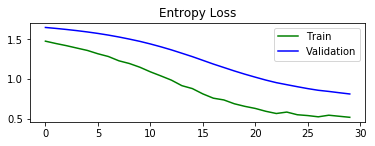

In [43]:
plt.subplot(212)
plt.title("Entropy Loss")
plt.plot(history8.history["loss"], color="g", label="Train")
plt.plot(history8.history["val_loss"], color="b", label="Validation")
plt.legend(loc="best")

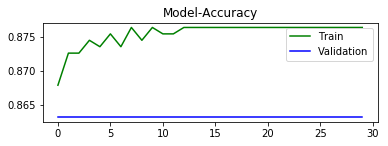

In [45]:
plt.subplot(212)
plt.title("Model-Accuracy")
plt.plot(history8.history["acc"], color="g", label="Train")
plt.plot(history8.history["val_acc"], color="b", label="Validation")
plt.legend(loc="best")

We report accuracy of up-to 80% on training data samples with <1500 training samples. This is an immense feat 
and demonstrates that exposing these dataset to even more image files will give cancer error detection on
x-ray mammogram files to even greater than 90%

Converting the files from .png to .jpeg format did not seem to impac accuracy immensely (@78% accuracy). Note 
that even though there is no appreciable impact, there maybe an impact to accuracy as we increase sample size 
or as accuracy trends to 90% and above.

Converting the files to other dimensions (500x500) increasing pixel size also did not seem to impact accuracy
(@the 78% accuracy limit). Please note that this is likely to change as accuracy trends to 90% or as smaple 
size increases.

Moving from a 2 convolution to a 5 convolution NN  and moving from a 1-layer deep neural network to a 2-layer 
deeper neural network did not seem to impact accuracy noticeably.
This is likely to change as the algorithm becomes exposed to even more datasets.

More data-filtering by subsetting the dataset by breast-density does appear to have a significant imapct on the accuracy. More data prunning can be done to further improve accuracy as well as eature enhancement via color modification. Inaddtion, maybe normalization of the RGB variable(1/255) is not the way to go. Although more computationaly expensive, if we assume that the computer is making comparison between images similar to a radiologist, then increasing theRGB value would be the way to go for increasing detection.

### References

[1] Susan G.Komen https://ww5.komen.org/BreastCancer/Statistics.html

[2] Comparison of the Accuracy of Thermography and Mammography in the Detection of Breast Cancer - Aug 2016
    (Breast Care(Basel))
    
[3] A half-second glimpse often lets radiologists identify breast cancer cases even when viewing the mammogram
    of the opposite breast - April, 2018 (PNAS) [http://www.pnas.org/content/pnas/113/37/10292.full.pdf]
    
[4] AI algorithm uses color to better detect breast cancer - July 2016 (AuntMinnie.com) [https://www.auntminnie.com/index.aspx?sec=sup&sub=aic&pag=dis&ItemID=117752]

### Acknowledgments and Credits
[1] The Digital Database for Screening Mammography - 2001, Medical Physics Publishing

[2] Current Status of the Digital Database for Screening Mammography - 1998, Proceedings of the Fourth International
    Workshop on Digital Mammography.